In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
Airlines = files.upload()

Saving Airlines+Data.xlsx to Airlines+Data.xlsx


In [3]:
airlines = pd.read_excel("Airlines+Data.xlsx")

In [ ]:
print(airlines)

In [ ]:
airlines.columns

In [4]:
# Converting the normal index of airlines dataset to times stamp
airlines.index = pd.to_datetime(airlines.Month,format="%b-%y")
print(airlines)

                Month  Passengers
Month                            
1995-01-01 1995-01-01         112
1995-02-01 1995-02-01         118
1995-03-01 1995-03-01         132
1995-04-01 1995-04-01         129
1995-05-01 1995-05-01         121
...               ...         ...
2002-08-01 2002-08-01         405
2002-09-01 2002-09-01         355
2002-10-01 2002-10-01         306
2002-11-01 2002-11-01         271
2002-12-01 2002-12-01         306

[96 rows x 2 columns]


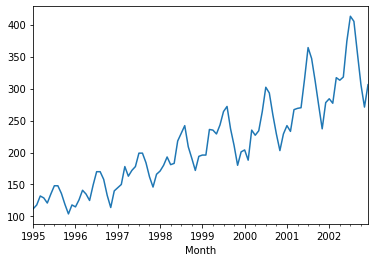

In [ ]:
airlines.Passengers.plot()

In [ ]:
airlines.head(12)

In [5]:
# Creating the Date column to store the actual date format for the given month
airlines['Date'] = pd.to_datetime(airlines.Month, format = "%b-%y")
print(airlines)

                Month  Passengers       Date
Month                                       
1995-01-01 1995-01-01         112 1995-01-01
1995-02-01 1995-02-01         118 1995-02-01
1995-03-01 1995-03-01         132 1995-03-01
1995-04-01 1995-04-01         129 1995-04-01
1995-05-01 1995-05-01         121 1995-05-01
...               ...         ...        ...
2002-08-01 2002-08-01         405 2002-08-01
2002-09-01 2002-09-01         355 2002-09-01
2002-10-01 2002-10-01         306 2002-10-01
2002-11-01 2002-11-01         271 2002-11-01
2002-12-01 2002-12-01         306 2002-12-01

[96 rows x 3 columns]


In [6]:
# Extracting Day, Weekday name, month name, year from the date column using Date functions from pandas
airlines["month"] = airlines.Date.dt.strftime("%b")
airlines

,Month,Passengers,Date,month
Month,,,,
1995-01-01,1995-01-01,112,1995-01-01,Jan
1995-02-01,1995-02-01,118,1995-02-01,Feb
1995-03-01,1995-03-01,132,1995-03-01,Mar
1995-04-01,1995-04-01,129,1995-04-01,Apr
1995-05-01,1995-05-01,121,1995-05-01,May
...,...,...,...,...
2002-08-01,2002-08-01,405,2002-08-01,Aug
2002-09-01,2002-09-01,355,2002-09-01,Sep
2002-10-01,2002-10-01,306,2002-10-01,Oct


In [7]:
airlines["year"] = airlines.Date.dt.strftime("%y")
airlines

,Month,Passengers,Date,month,year
Month,,,,,
1995-01-01,1995-01-01,112,1995-01-01,Jan,95
1995-02-01,1995-02-01,118,1995-02-01,Feb,95
1995-03-01,1995-03-01,132,1995-03-01,Mar,95
1995-04-01,1995-04-01,129,1995-04-01,Apr,95
1995-05-01,1995-05-01,121,1995-05-01,May,95
...,...,...,...,...,...
2002-08-01,2002-08-01,405,2002-08-01,Aug,02
2002-09-01,2002-09-01,355,2002-09-01,Sep,02
2002-10-01,2002-10-01,306,2002-10-01,Oct,02


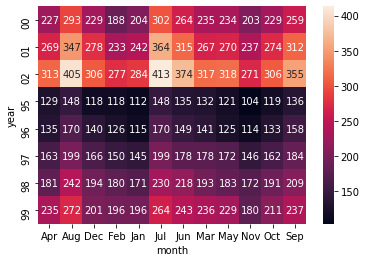

In [ ]:
# Heat map visulization
heatmap_year_month = pd.pivot_table(data=airlines, values="Passengers",index = "year", columns= "month",aggfunc = "mean", fill_value=0)
sns.heatmap(heatmap_year_month,annot=True,fmt="g")

In [ ]:
# Boxplot for all the data
sns.boxplot(x="month",y="Passengers",data=airlines)

In [ ]:
sns.boxplot(x="year",y = "Passengers",data=airlines)

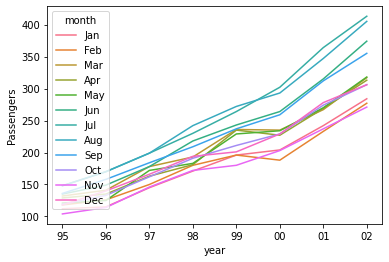

In [ ]:
# Line plot for plane passengers based on year and for each month
sns.lineplot(x="year",y="Passengers",hue = "month",data=airlines)

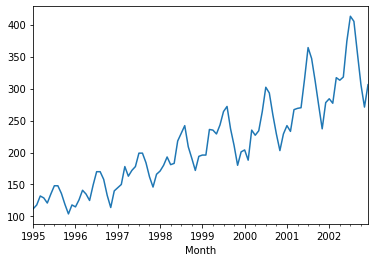

In [ ]:
# Lets see the moving average for the time series to understand better about the trend character in airlines
airlines.Passengers.plot(label="org")

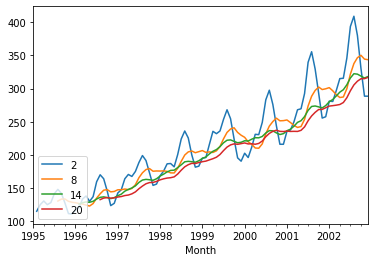

In [8]:
for i in range(2,24,6):
  airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

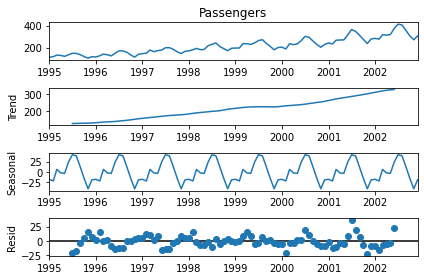

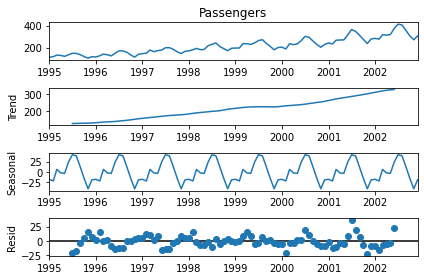

In [ ]:
# Time series decomposition plot
decompose_ts_add = seasonal_decompose(airlines.Passengers,model="additive")
decompose_ts_add.plot()

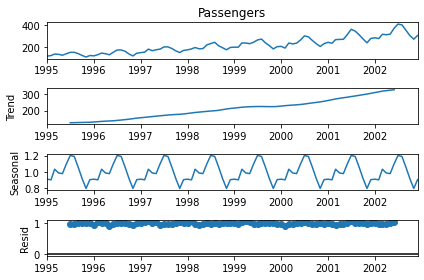

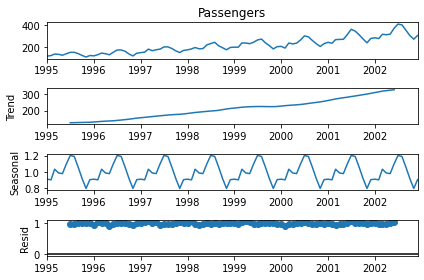

In [ ]:
# Decomposition plot for multiplicative seasonality
decompose_ts_mul = seasonal_decompose(airlines.Passengers,model = "multiplicative")
decompose_ts_mul.plot()

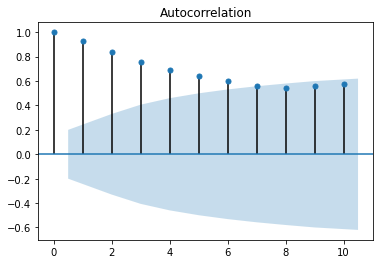

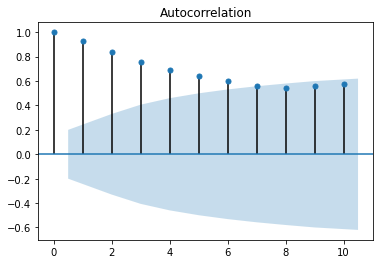

In [ ]:
# ACF plots and PACF plots on the original data sets
# ACF plot
tsa_plots.plot_acf(airlines.Passengers,lags=10)
# From ACF we can decide that the range of the q value will be from 1 to 7

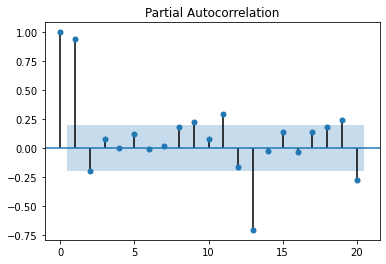

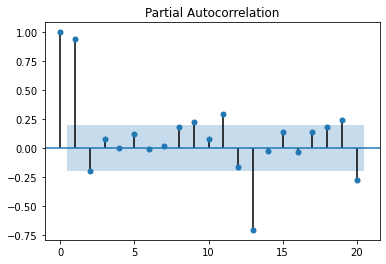

In [ ]:
# PACF plot
tsa_plots.plot_pacf(airlines.Passengers)
# From PACF plot we can say that the values 1,9 and 11 will be significant for the q value.

In [ ]:
len(airlines)

96

In [9]:
# Let's split the given data into train and test data where the last 12 months will be test data while the remaining will be train data.
train = airlines.head(84)
test = airlines.tail(12)
test,train

(                Month  Passengers       Date month year
 Month                                                  
 2002-01-01 2002-01-01         284 2002-01-01   Jan   02
 2002-02-01 2002-02-01         277 2002-02-01   Feb   02
 2002-03-01 2002-03-01         317 2002-03-01   Mar   02
 2002-04-01 2002-04-01         313 2002-04-01   Apr   02
 2002-05-01 2002-05-01         318 2002-05-01   May   02
 2002-06-01 2002-06-01         374 2002-06-01   Jun   02
 2002-07-01 2002-07-01         413 2002-07-01   Jul   02
 2002-08-01 2002-08-01         405 2002-08-01   Aug   02
 2002-09-01 2002-09-01         355 2002-09-01   Sep   02
 2002-10-01 2002-10-01         306 2002-10-01   Oct   02
 2002-11-01 2002-11-01         271 2002-11-01   Nov   02
 2002-12-01 2002-12-01         306 2002-12-01   Dec   02,
                 Month  Passengers       Date month year
 Month                                                  
 1995-01-01 1995-01-01         112 1995-01-01   Jan   95
 1995-02-01 1995-02-01        

In [10]:
test

,Month,Passengers,Date,month,year
Month,,,,,
2002-01-01,2002-01-01,284,2002-01-01,Jan,02
2002-02-01,2002-02-01,277,2002-02-01,Feb,02
2002-03-01,2002-03-01,317,2002-03-01,Mar,02
2002-04-01,2002-04-01,313,2002-04-01,Apr,02
2002-05-01,2002-05-01,318,2002-05-01,May,02
2002-06-01,2002-06-01,374,2002-06-01,Jun,02
2002-07-01,2002-07-01,413,2002-07-01,Jul,02
2002-08-01,2002-08-01,405,2002-08-01,Aug,02
2002-09-01,2002-09-01,355,2002-09-01,Sep,02


In [11]:
# Crating a function to calculate the MAPE of the test data
# MAPE Stands for Mean Absolute Percentage Error
def MAPE(pred,org):
  temp = np.abs((pred-org))*100/org
  return np.mean(temp)


In [13]:
# Now let's build various models for the prepared train and test data
# Simple Exponential Method
ses_model = SimpleExpSmoothing(train["Passengers"]).fit()
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
mape_ses = MAPE(pred_ses,test.Passengers)
print(MAPE(pred_ses,test.Passengers))

14.235433039401634


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [14]:
# Holt method
hw_model = Holt(train["Passengers"]).fit()
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
mape_hw = MAPE(pred_hw,test.Passengers)
print(MAPE(pred_hw,test.Passengers))

11.840921076536139


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [15]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal = "add",trend = "add", seasonal_periods = 12, damped = True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
mape_hwe_add_add = MAPE(pred_hwe_add_add,test.Passengers)
print(MAPE(pred_hwe_add_add,test.Passengers))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


1.6177582303684097


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [16]:
# Holts winter exponential smoothing with miltiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods = 12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
mape_hwe_mul_add = MAPE(pred_hwe_mul_add,test.Passengers)
MAPE(pred_hwe_mul_add,test.Passengers)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


2.8203589155579554

In [18]:
pip install pmdarima

     |████████████████████████████████| 1.5 MB 31.2 MB/s 
     |████████████████████████████████| 9.5 MB 46.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [19]:
# Let's use auto_arima
import pmdarima as pm
from pmdarima import model_selection

In [20]:
auto_arima_model = pm.auto_arima(train["Passengers"],start_p= 0,start_q = 0,max_p = 10,max_q = 10,m=12,start_P = 0,seasonal = True,d=1,D=1,trace = True,error_action= "ignore",supress_warnigs=True,stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=536.198, Time=0.11 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=533.081, Time=0.17 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=533.128, Time=0.10 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=534.950, Time=0.26 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=534.789, Time=0.27 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.96 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=533.591, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=531.484, Time=0.21 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=531.004, Time=0.17 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=533.002, Time=0.32 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(2,1,0)[12]             : 

In [21]:
# To look at the model's some of the important aspects and points we will take the summary of the model.
#where we will look at the SARIMAX(1,1,1)x(0,1,1,12), AIC, BIC,etc.
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   84
Model:             SARIMAX(0, 1, 3)x(1, 1, 0, 12)   Log Likelihood                -260.238
Date:                            Thu, 22 Jul 2021   AIC                            530.476
Time:                                    09:08:53   BIC                            541.789
Sample:                                         0   HQIC                           534.975
                                             - 84                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2709      0.124     -2.186      0.029      -0.514      -0.028
ma.L2          0.0498      0.145      0.343      0.732      -0.235       0.334
ma.L3         -0.2590      0.145     -1.785      0.074      -0.543       0.025
ar.S.L12      -0.2329      0.122     -1.913      0.056      -0.472       0.006
sigma2        88.1575     15.740      5.601      0.000      57.308     119.007
===================================================================================
Ljung-Box (Q):                       22.89   Jarque-Bera (JB):                 1.37
Prob(Q):                              0.99   Prob(JB):                         0.51
Heteroskedasticity (H):               2.57   Skew:                             0.33
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
# Now to get the fitted values of the train data set we will use the function "predict_in_sample()"
auto_arima_model.predict_in_sample()

array([  0.        , 111.99844813, 118.00045967, 131.9983274 ,
       129.00009469, 120.99985026, 134.99959501, 147.99998934,
       147.99980738, 136.00033356, 119.0002249 , 104.00093982,
       174.00148179, 121.00367303, 138.69847684, 137.95241331,
       126.69489266, 138.73784251, 159.88034261, 168.2417247 ,
       155.3921597 , 137.77522823, 119.34138534, 128.65599979,
       135.16758635, 154.15310809, 163.5753938 , 166.17053594,
       156.10557353, 185.48892165, 200.77934329, 194.99711948,
       187.7659232 , 162.54354665, 142.85499148, 169.3011275 ,
       170.32835268, 176.23678653, 204.8408272 , 183.31770709,
       184.63883213, 196.58757927, 233.7171695 , 232.49702279,
       219.39383268, 190.55287944, 171.20192287, 195.8952032 ,
       199.43740916, 204.69869515, 215.17030159, 218.11498234,
       237.34474715, 254.9523333 , 255.54663872, 272.48097177,
       246.83871407, 218.52094576, 194.37145983, 207.60169156,
       206.71999734, 210.22647878, 229.30768694, 229.49

In [25]:
# For getting the predictions for the future value we will use predict() function
auto_arima_pred_test = pd.Series(auto_arima_model.predict(n_periods=12))
auto_arima_pred_test

0     285.244292
1     278.463824
2     312.094633
3     311.765493
4     314.162977
5     355.669267
6     402.107213
7     386.970525
8     352.203439
9     316.066751
10    281.628805
11    319.135095
dtype: float64

In [ ]:
test

In [26]:
# Let's add the index values of the Test Data set to predictions of Auto Arima
auto_arima_pred_test.index = test.index
mape_auto_arima_model = MAPE(auto_arima_pred_test,test.Passengers)
MAPE(pred_test,test.Passengers)

2.366470424009851

In [ ]:
# Now Let's use Sarimax from statsmodels
# As we don't have automatic function in identifying the best p,d,q combination, iterate over multiple combinations and return the best combination.
# For sarimax we require p,d,q and P,D,Q
from itertools import product
combinations_l = list(product(range(1,7),range(2),(1,9)))
combinations_u = list(product(range(1,7),range(2),(1,9)))
print(combinations_l)
len(combinations_l)

[(1, 0, 1), (1, 0, 9), (1, 1, 1), (1, 1, 9), (2, 0, 1), (2, 0, 9), (2, 1, 1), (2, 1, 9), (3, 0, 1), (3, 0, 9), (3, 1, 1), (3, 1, 9), (4, 0, 1), (4, 0, 9), (4, 1, 1), (4, 1, 9), (5, 0, 1), (5, 0, 9), (5, 1, 1), (5, 1, 9), (6, 0, 1), (6, 0, 9), (6, 1, 1), (6, 1, 9)]


24

In [ ]:
print(combinations_u)
len(combinations_u)

[(1, 0, 1), (1, 0, 9), (1, 1, 1), (1, 1, 9), (2, 0, 1), (2, 0, 9), (2, 1, 1), (2, 1, 9), (3, 0, 1), (3, 0, 9), (3, 1, 1), (3, 1, 9), (4, 0, 1), (4, 0, 9), (4, 1, 1), (4, 1, 9), (5, 0, 1), (5, 0, 9), (5, 1, 1), (5, 1, 9), (6, 0, 1), (6, 0, 9), (6, 1, 1), (6, 1, 9)]


24

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Even with the least number of required combinations it takes too long to complete the model's execution
# Hence I will skip the execution of the further code where we get the predictions and find out its MAPE.
# But up to the ARIMA model I have done all the requiered procedures.

In [ ]:
# m = 12
# results_sarima = []
# best_aic = float("inf")

# for i in combinations_l:
#   for j in combinations_u:
#     try:
#       model_sarima = sm.tsa.statespace.SARIMAX(train["Passengers"],order = i,seasonal_order = j+(m,)).fit(disp=-1)
#     except:
#       continue
#     aic = model_sarima.aic
#     if aic < best_aic:
#       best_model = model_sarima
#       best_aic = aic
#       best_l = i
#       best_u = j
#     results_sarima.append([i,j,model_sarima.aic])


In [ ]:
# dictionary = dict()
# m = 12
# for i in combinations_l:
#   for j in combinations_u:
#     try:
#       model = sm.tsa.statespace.SARIMAX(train["Passengers"],order = i, seasonal_order = j+(m,))
#       model_sarima = model.fit()
#       print('ARIMA{}x{}12 - AIC:{}'.format(i,j,model_sarima.aic))
#       dictionary.update({(i,j):model_sarima.aic})
#     except:
#       continue

In [ ]:
dictionary

{}

In [ ]:
# result_sarima_table = pd.DataFrame(results_sarima)
# result_sarima_table.columns = ["parameters_1","parameters_j","aic"]
# result_sarima_table = result_sarima_table.sort_values(by="aic",ascending=True).reset_index(drop=True)


In [27]:
best_fit_model = sm.tsa.statespace.SARIMAX(train["Passengers"],order = (1,1,1),seasonal_order = (1,1,1,12)).fit(disp=-1) # disp = -1 helps to neglect the errors.
best_fit_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -262.346
Date:                            Thu, 22 Jul 2021   AIC                            534.691
Time:                                    09:11:49   BIC                            546.005
Sample:                                01-01-1995   HQIC                           539.190
                                     - 12-01-2001                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6310      0.373     -1.692      0.091      -1.362       0.100
ma.L1          0.4287      0.405      1.059      0.289      -0.364       1.222
ar.S.L12      -0.2772      0.554     -0.500      0.617      -1.363       0.809
ma.S.L12       0.0361      0.630      0.057      0.954      -1.199       1.271
sigma2        93.7524     17.521      5.351      0.000      59.411     128.094
===================================================================================
Ljung-Box (Q):                       29.88   Jarque-Bera (JB):                 2.02
Prob(Q):                              0.88   Prob(JB):                         0.36
Heteroskedasticity (H):               2.57   Skew:                             0.36
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
best_fit_model.aic

534.6911586157977

In [32]:
sarima_pred = best_fit_model.predict(start = test.index[0],end = test.index[-1])
airlines["sarima_pred"] = sarima_pred
sarima_pred

2002-01-01    284.893732
2002-02-01    276.406835
2002-03-01    312.119130
2002-04-01    312.573998
2002-05-01    314.549123
2002-06-01    356.448439
2002-07-01    402.706799
2002-08-01    387.637151
2002-09-01    352.794318
2002-10-01    316.750086
2002-11-01    282.412942
2002-12-01    319.862817
Freq: MS, dtype: float64

In [33]:
mape_sarima = MAPE(sarima_pred,test.Passengers)
mape_sarima

2.303195634084036

In [35]:
MAPE_Table ={"MODLE" : pd.Series(["ses_model","hw_model","hwe_model_add_add","hwe_model_mul_mul","auto_arima_model","sarima_model"]),
             "MAPE": pd.Series([mape_ses,mape_hw,mape_hwe_add_add,mape_hwe_mul_add,mape_auto_arima_model,mape_sarima])}
MAPE_Table

{'MAPE': 0    14.235433
 1    11.840921
 2     1.617758
 3     2.820359
 4     2.366470
 5     2.303196
 dtype: float64, 'MODLE': 0            ses_model
 1             hw_model
 2    hwe_model_add_add
 3    hwe_model_mul_mul
 4     auto_arima_model
 5         sarima_model
 dtype: object}

In [37]:
Best_model_comparison_table = pd.DataFrame(MAPE_Table)
Best_model_comparison_table

,MODLE,MAPE
0,ses_model,14.235433
1,hw_model,11.840921
2,hwe_model_add_add,1.617758
3,hwe_model_mul_mul,2.820359
4,auto_arima_model,2.366470
5,sarima_model,2.303196


In [ ]:
# # So by taking a look at the table we can say that the "Holt's Winter Exponential Model with Additive Seasonality and Additive Trend" is giving the least MAPE 
# value i.e. Error. So we will use this model for the prediction and forecasting of the similar data in future.